# Exploratory Data Analysis

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
import glob
#from IPython.core.debugger import set_trace

In [0]:
#confirm we are in DASHlink
!pwd

/home/proj/DASHlink


In [0]:
!ls

10_mat2csv-2.ipynb  20_eda1-2.ipynb  Tail_687_1  Tail_test
10_mat2csv.ipynb    20_eda1.ipynb    Tail_687_2


In [0]:
TAIL = 'Tail_687_1'
#TAIL = 'Tail_687_2'
#TAIL = 'Tail_test'

In [0]:
#rather do manually, we don't want to accidentally delete, e.g. all notebooks
#!rm {TAIL}/*.*

In [0]:
!cp {TAIL}/1min/*.csv {TAIL}

TOTAL FILES TO PROCESS: 594



/home/proj/anaconda3/envs/fastai-py37/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/proj/anaconda3/envs/fastai-py37/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-97.59722572408238, right=-97.59722572408238
  ax.set_xlim(left, right)
/home/proj/anaconda3/envs/fastai-py37/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-93.20285368122559, right=-93.20285368122559
  ax.set_xlim(left, right)


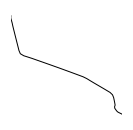

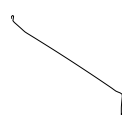

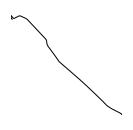

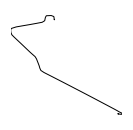

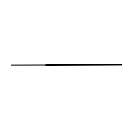

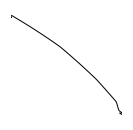

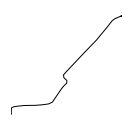

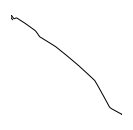

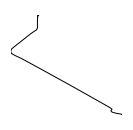

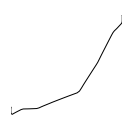

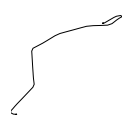

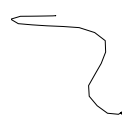

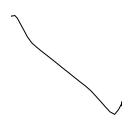

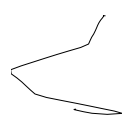

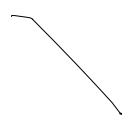

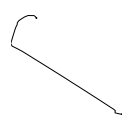

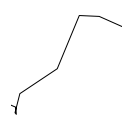

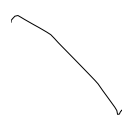

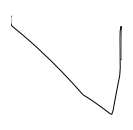

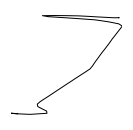

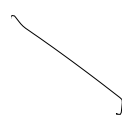

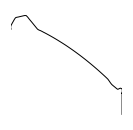

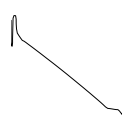

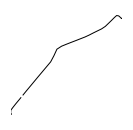

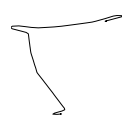

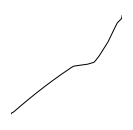

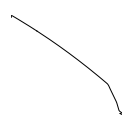

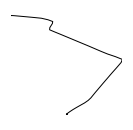

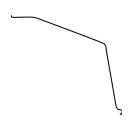

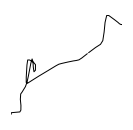

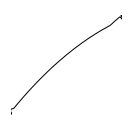

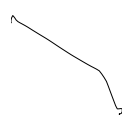

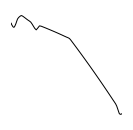

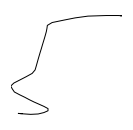

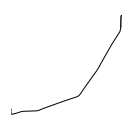

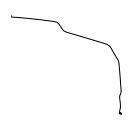

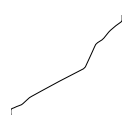

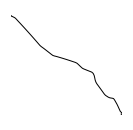

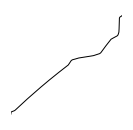

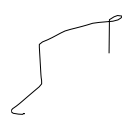

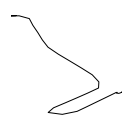

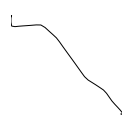

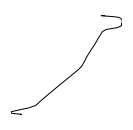

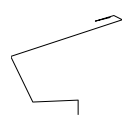

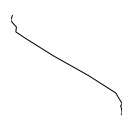

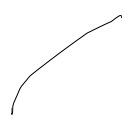

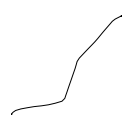

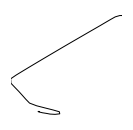

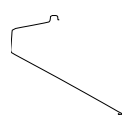

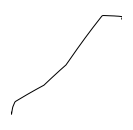

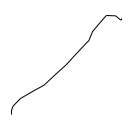

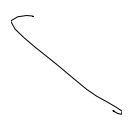

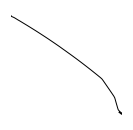

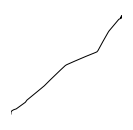

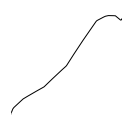

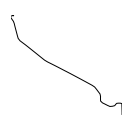

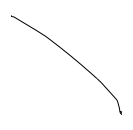

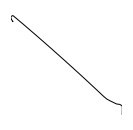

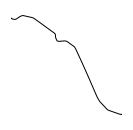

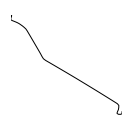

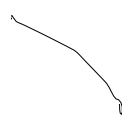

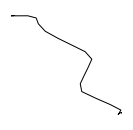

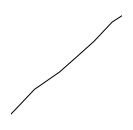

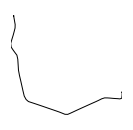

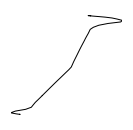

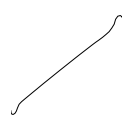

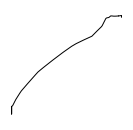

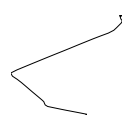

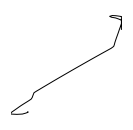

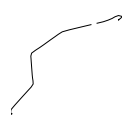

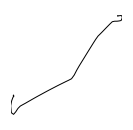

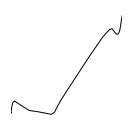

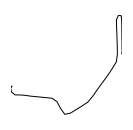

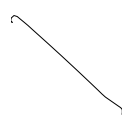

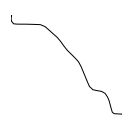

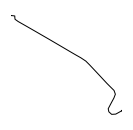

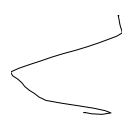

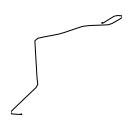

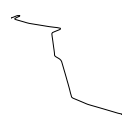

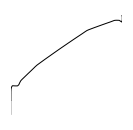

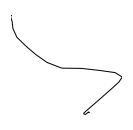

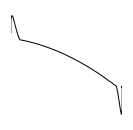

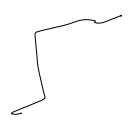

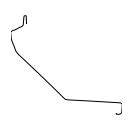

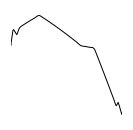

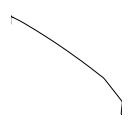

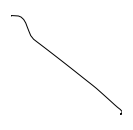

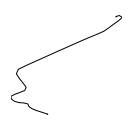

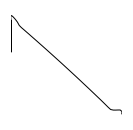

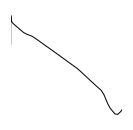

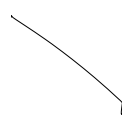

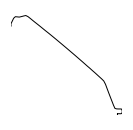

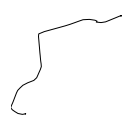

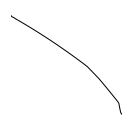

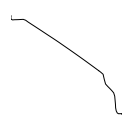

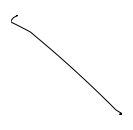

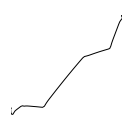

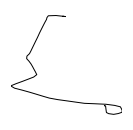

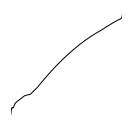

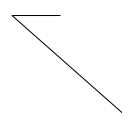

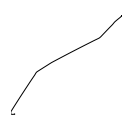

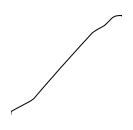

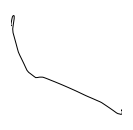

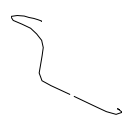

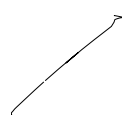

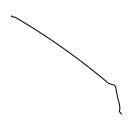

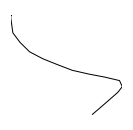

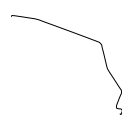

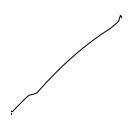

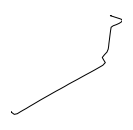

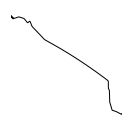

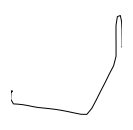

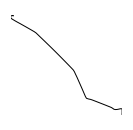

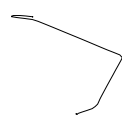

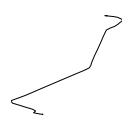

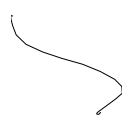

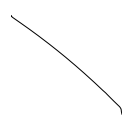

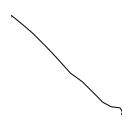

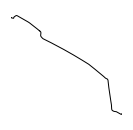

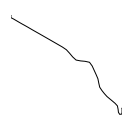

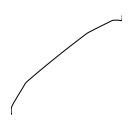

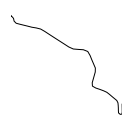

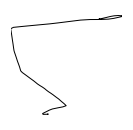

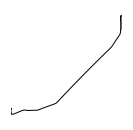

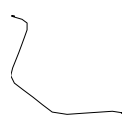

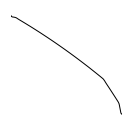

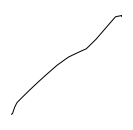

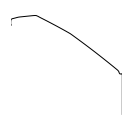

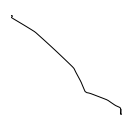

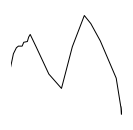

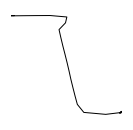

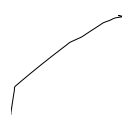

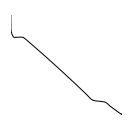

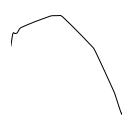

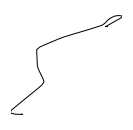

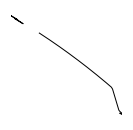

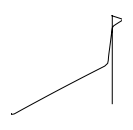

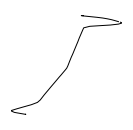

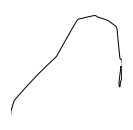

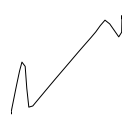

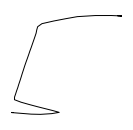

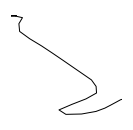

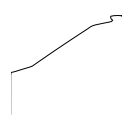

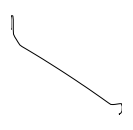

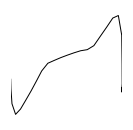

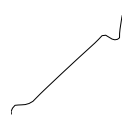

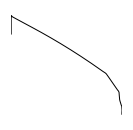

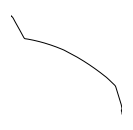

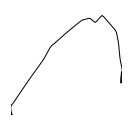

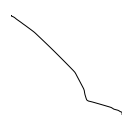

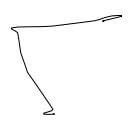

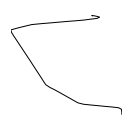

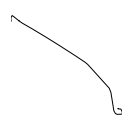

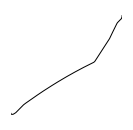

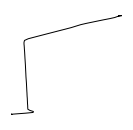

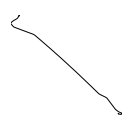

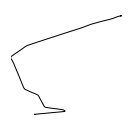

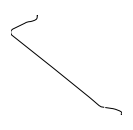

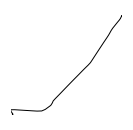

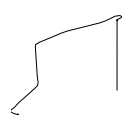

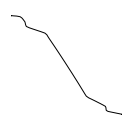

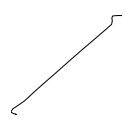

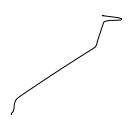

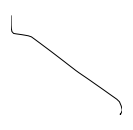

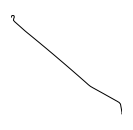

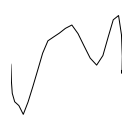

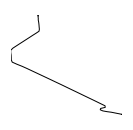

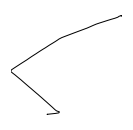

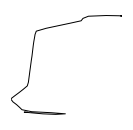

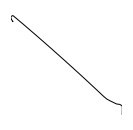

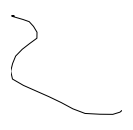

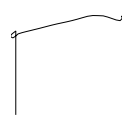

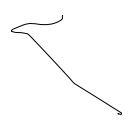

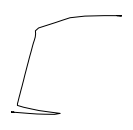

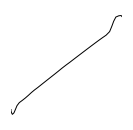

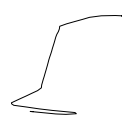

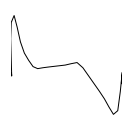

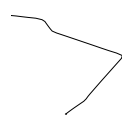

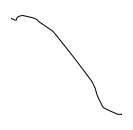

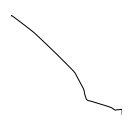

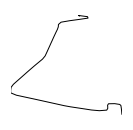

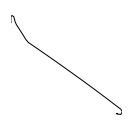

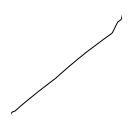

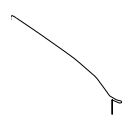

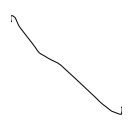

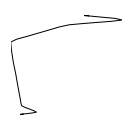

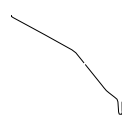

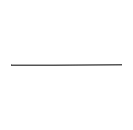

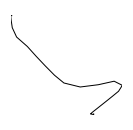

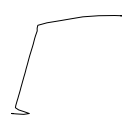

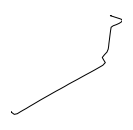

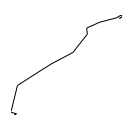

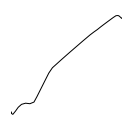

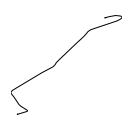

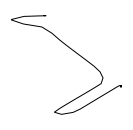

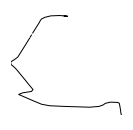

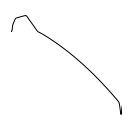

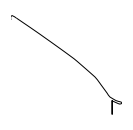

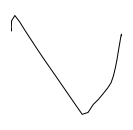

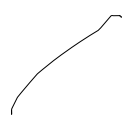

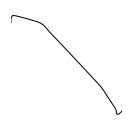

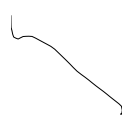

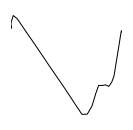

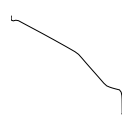

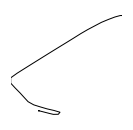

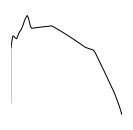

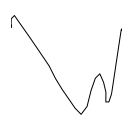

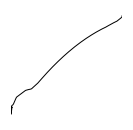

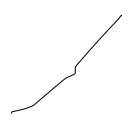

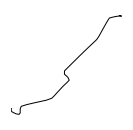

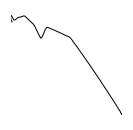

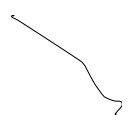

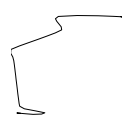

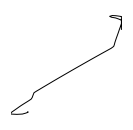

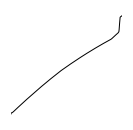

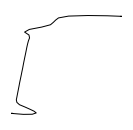

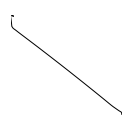

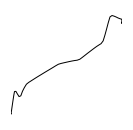

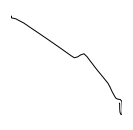

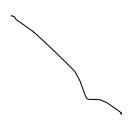

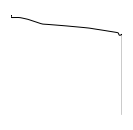

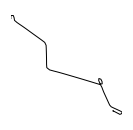

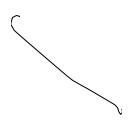

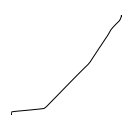

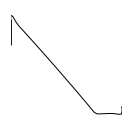

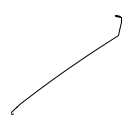

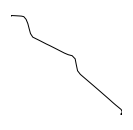

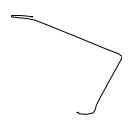

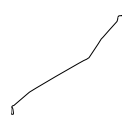

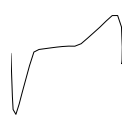

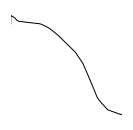

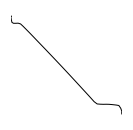

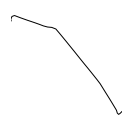

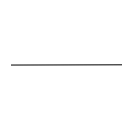

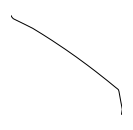

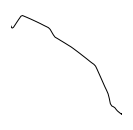

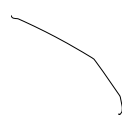

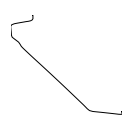

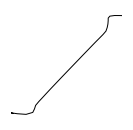

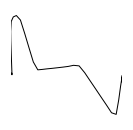

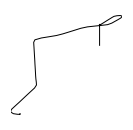

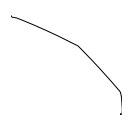

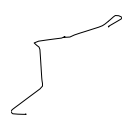

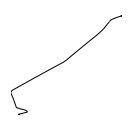

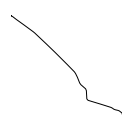

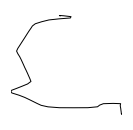

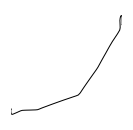

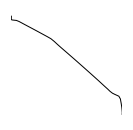

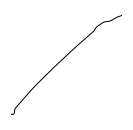

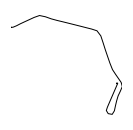

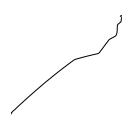

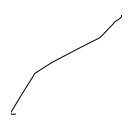

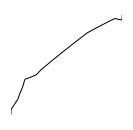

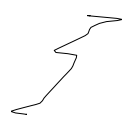

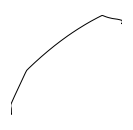

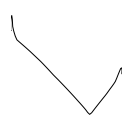

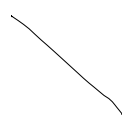

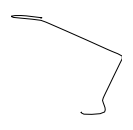

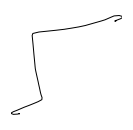

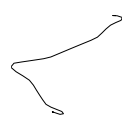

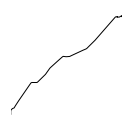

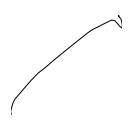

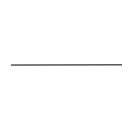

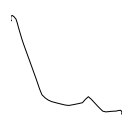

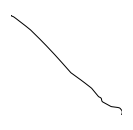

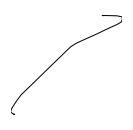

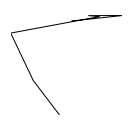

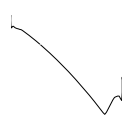

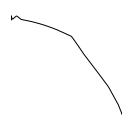

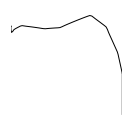

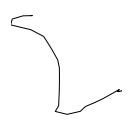

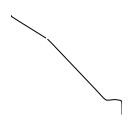

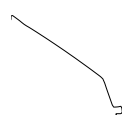

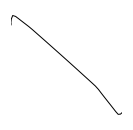

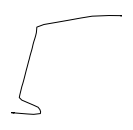

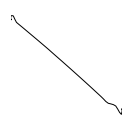

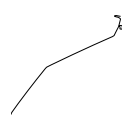

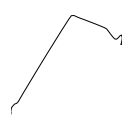

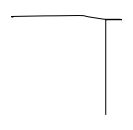

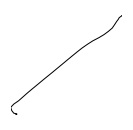

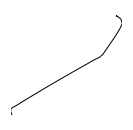

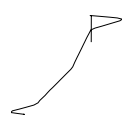

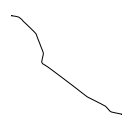

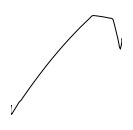

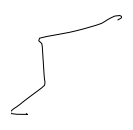

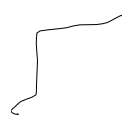

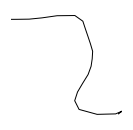

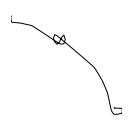

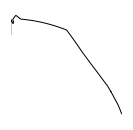

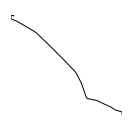

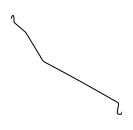

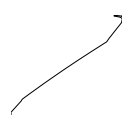

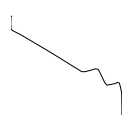

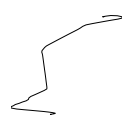

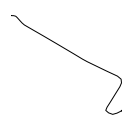

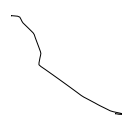

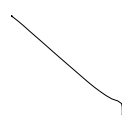

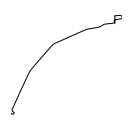

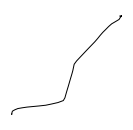

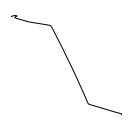

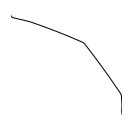

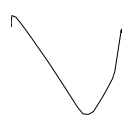

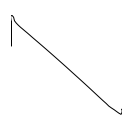

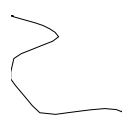

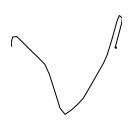

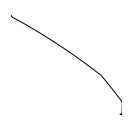

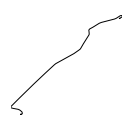

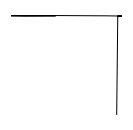

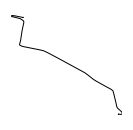

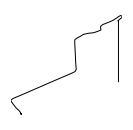

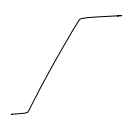

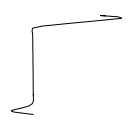

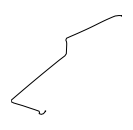

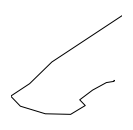

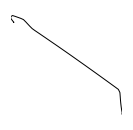

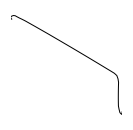

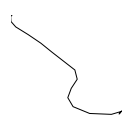

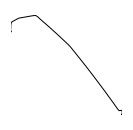

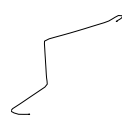

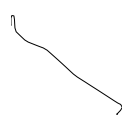

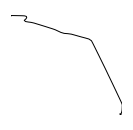

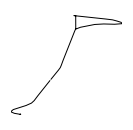

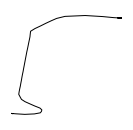

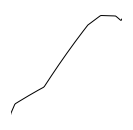

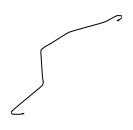

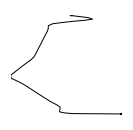

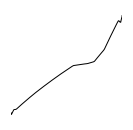

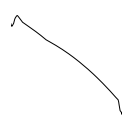

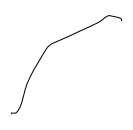

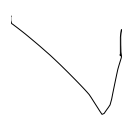

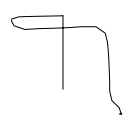

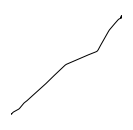

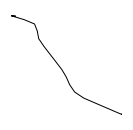

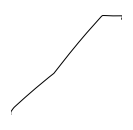

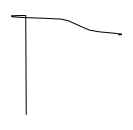

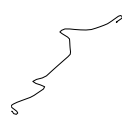

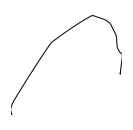

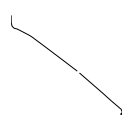

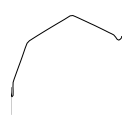

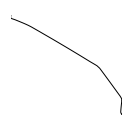

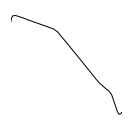

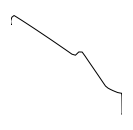

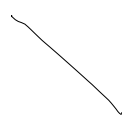

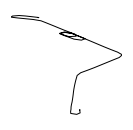

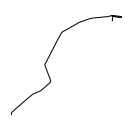

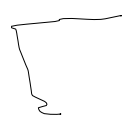

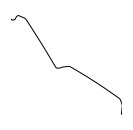

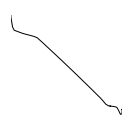

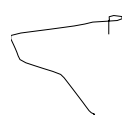

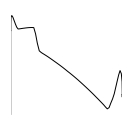

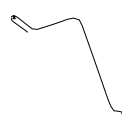

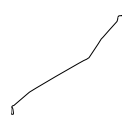

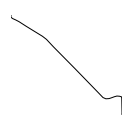

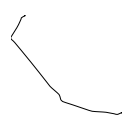

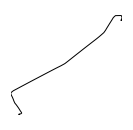

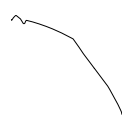

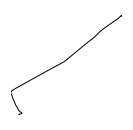

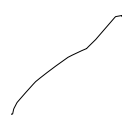

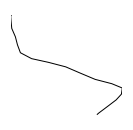

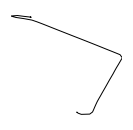

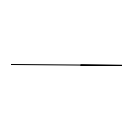

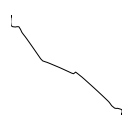

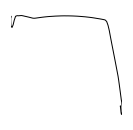

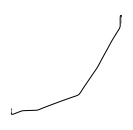

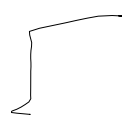

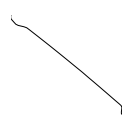

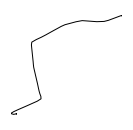

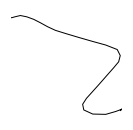

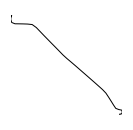

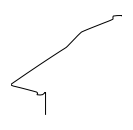

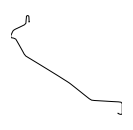

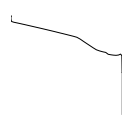

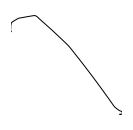

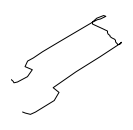

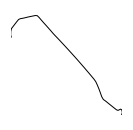

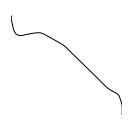

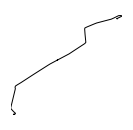

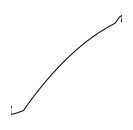

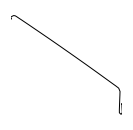

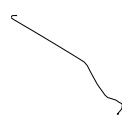

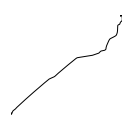

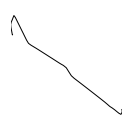

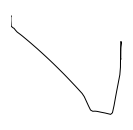

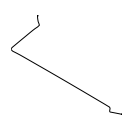

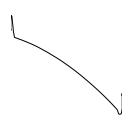

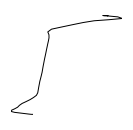

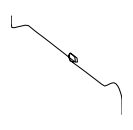

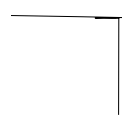

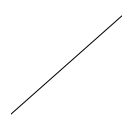

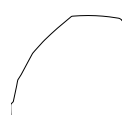

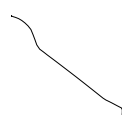

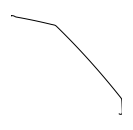

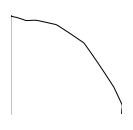

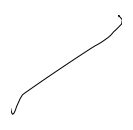

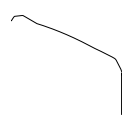

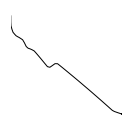

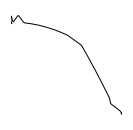

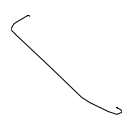

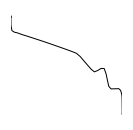

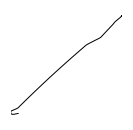

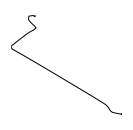

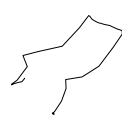

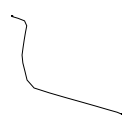

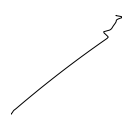

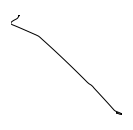

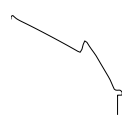

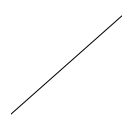

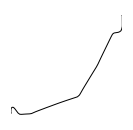

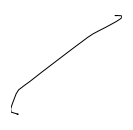

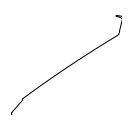

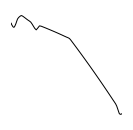

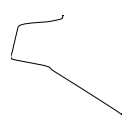

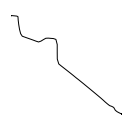

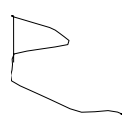

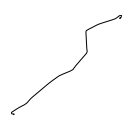

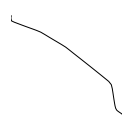

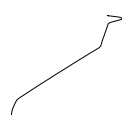

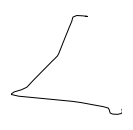

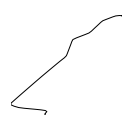

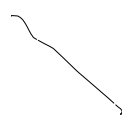

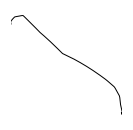

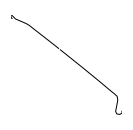

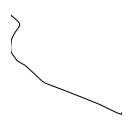

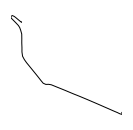

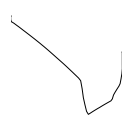

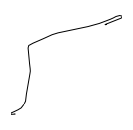

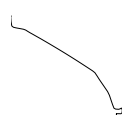

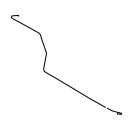

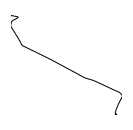

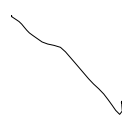

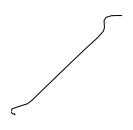

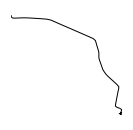

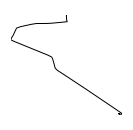

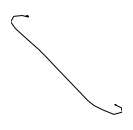

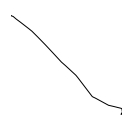

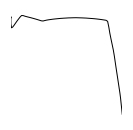

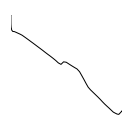

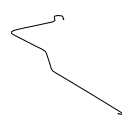

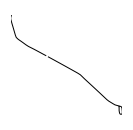

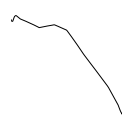

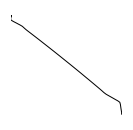

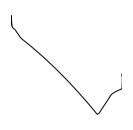

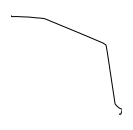

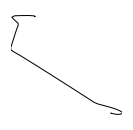

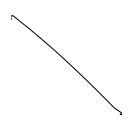

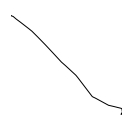

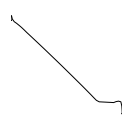

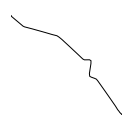

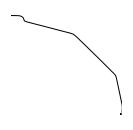

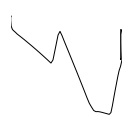

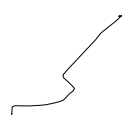

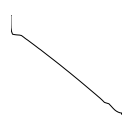

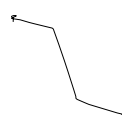

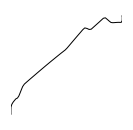

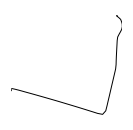

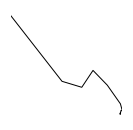

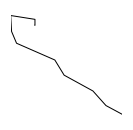

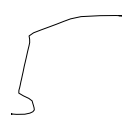

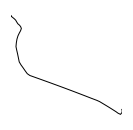

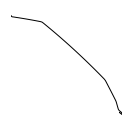

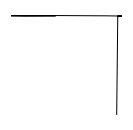

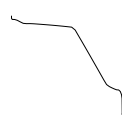

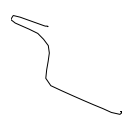

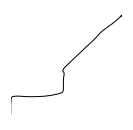

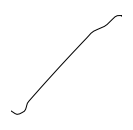

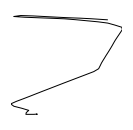

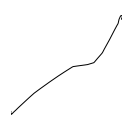

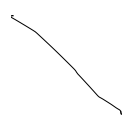

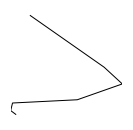

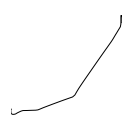

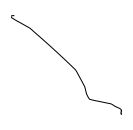

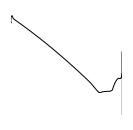

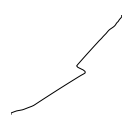

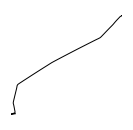

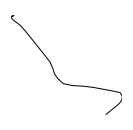

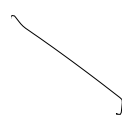

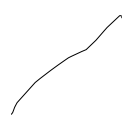

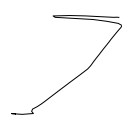

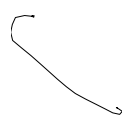

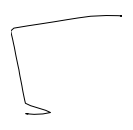

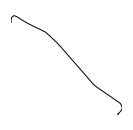

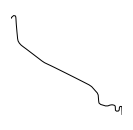

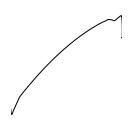

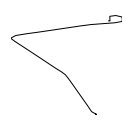

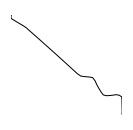

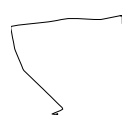

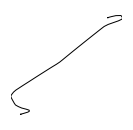

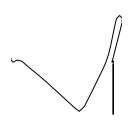

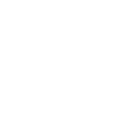

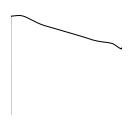

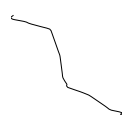

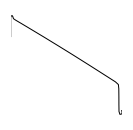

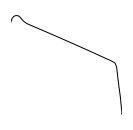

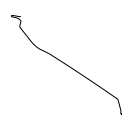

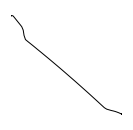

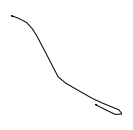

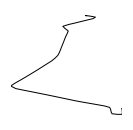

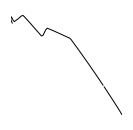

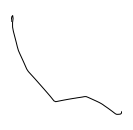

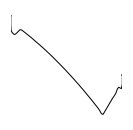

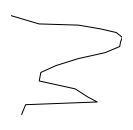

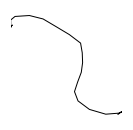

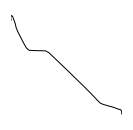

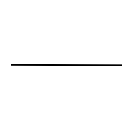

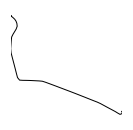

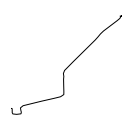

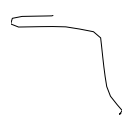

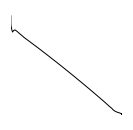

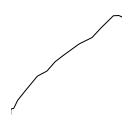

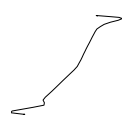

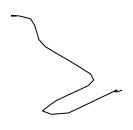

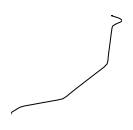

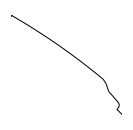

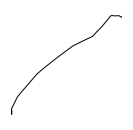

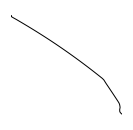

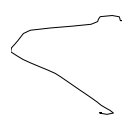

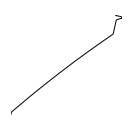

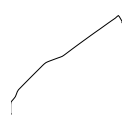

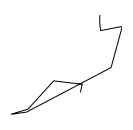

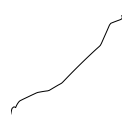

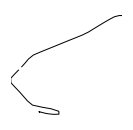

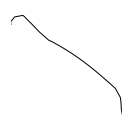

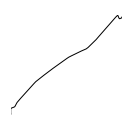

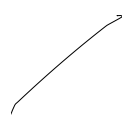

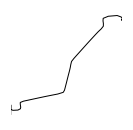

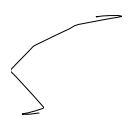

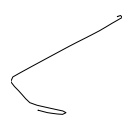

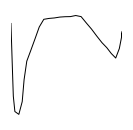

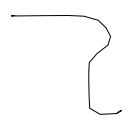

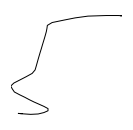

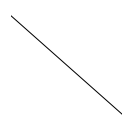

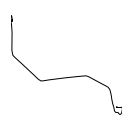

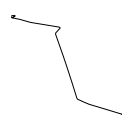

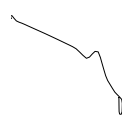

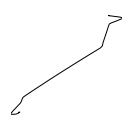

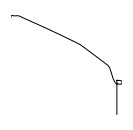

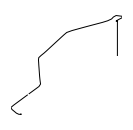

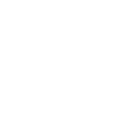

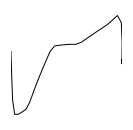

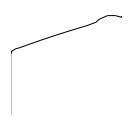

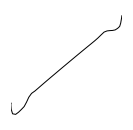

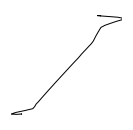

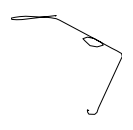

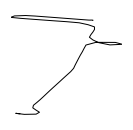

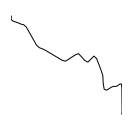

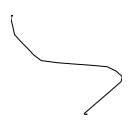

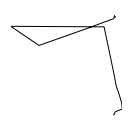

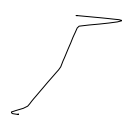

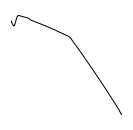

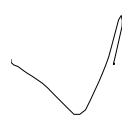

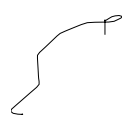

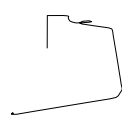

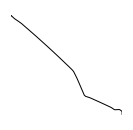

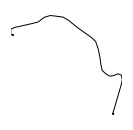

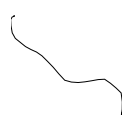

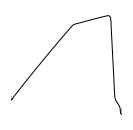

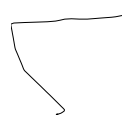

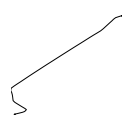

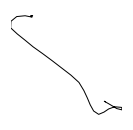

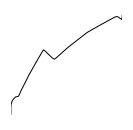

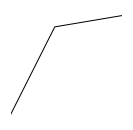

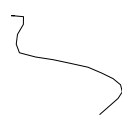

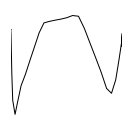

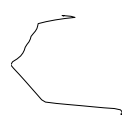

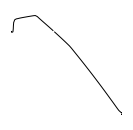

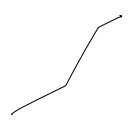

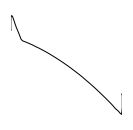

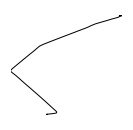

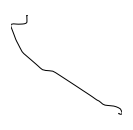

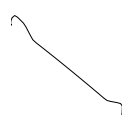

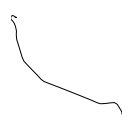

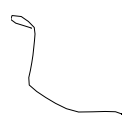

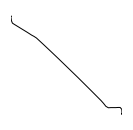

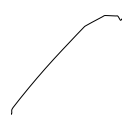

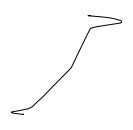

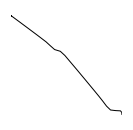

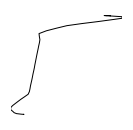

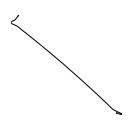

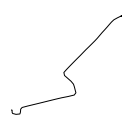

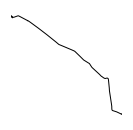

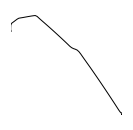

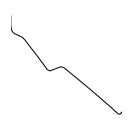

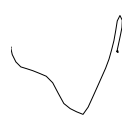

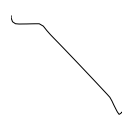

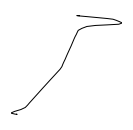

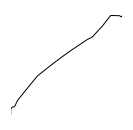

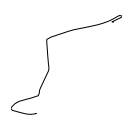

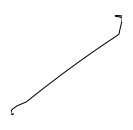

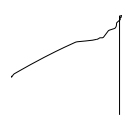

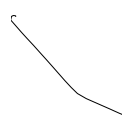

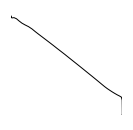

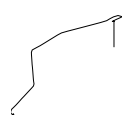

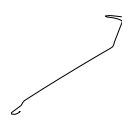

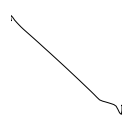

In [0]:
allFiles = glob.glob(TAIL + "/*.csv")
n = len(allFiles)
print(f'TOTAL FILES TO PROCESS: {n}\n')
#plt.figure(figsize=(12,8))
#fig = plt.gcf()
#ax = plt.gca()
for i,file_ in enumerate(allFiles):
    #print(file_)
    df = pd.read_csv(file_, index_col='datetime', low_memory=False); #print(df.shape); #print(df.head())
    parts = file_.split('.'); proper = parts[0]; ext = parts[1]; #print(proper, ext)

    #FIGSIZ = (2,2)
    #ax=df.loc[df.index.min():df.index.max(), ['ALT']] \
    # .plot(figsize=FIGSIZ,lw=1,ls='-',marker='None',mfc='None',ms=6,legend=False,c='k')
    
    FIGSIZ = (2,2)
    ax = df.loc[df.index.min():df.index.max(), ['LONP','LATP']] \
    .plot(figsize=FIGSIZ, 
          x='LONP',y='LATP',kind='line',ls='-',lw=1,marker='None',mfc='None',ms=10,c='k',legend=False)

    ax.set_frame_on(False)
    ax.tick_params(bottom=False, left=False)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    plt.xlabel('')
    #ax.cla()
    
    #print(f'{proper}.png')  
    #plt.savefig(f'{proper}.png', dpi=100, bbox_inches='tight')
    plt.savefig(f'{proper}.png', bbox_inches='tight')
    !rm {file_} #origs are kept in 'hold'
    #print(f'{i+1} of {n} complete ........................\n')



## Experiment with 1min data

<class 'numpy.ndarray'>


"\nax[0].set_title('PRESSURE ALTITUDE LSP (ALT)')\nax[0].set_ylabel('FEET')\nax[1].set_title('BARO CORRECT ALTITUDE LSP (BAL1)')\nax[1].set_ylabel('FEET')\nax[2].set_title('BARO CORRECT ALTITUDE LSP (BAL2)')\nax[2].set_ylabel('FEET')\nax[3].set_title('RADIO ALTITUDE LSP (RALT)')\nax[3].set_ylabel('FEET')\n"

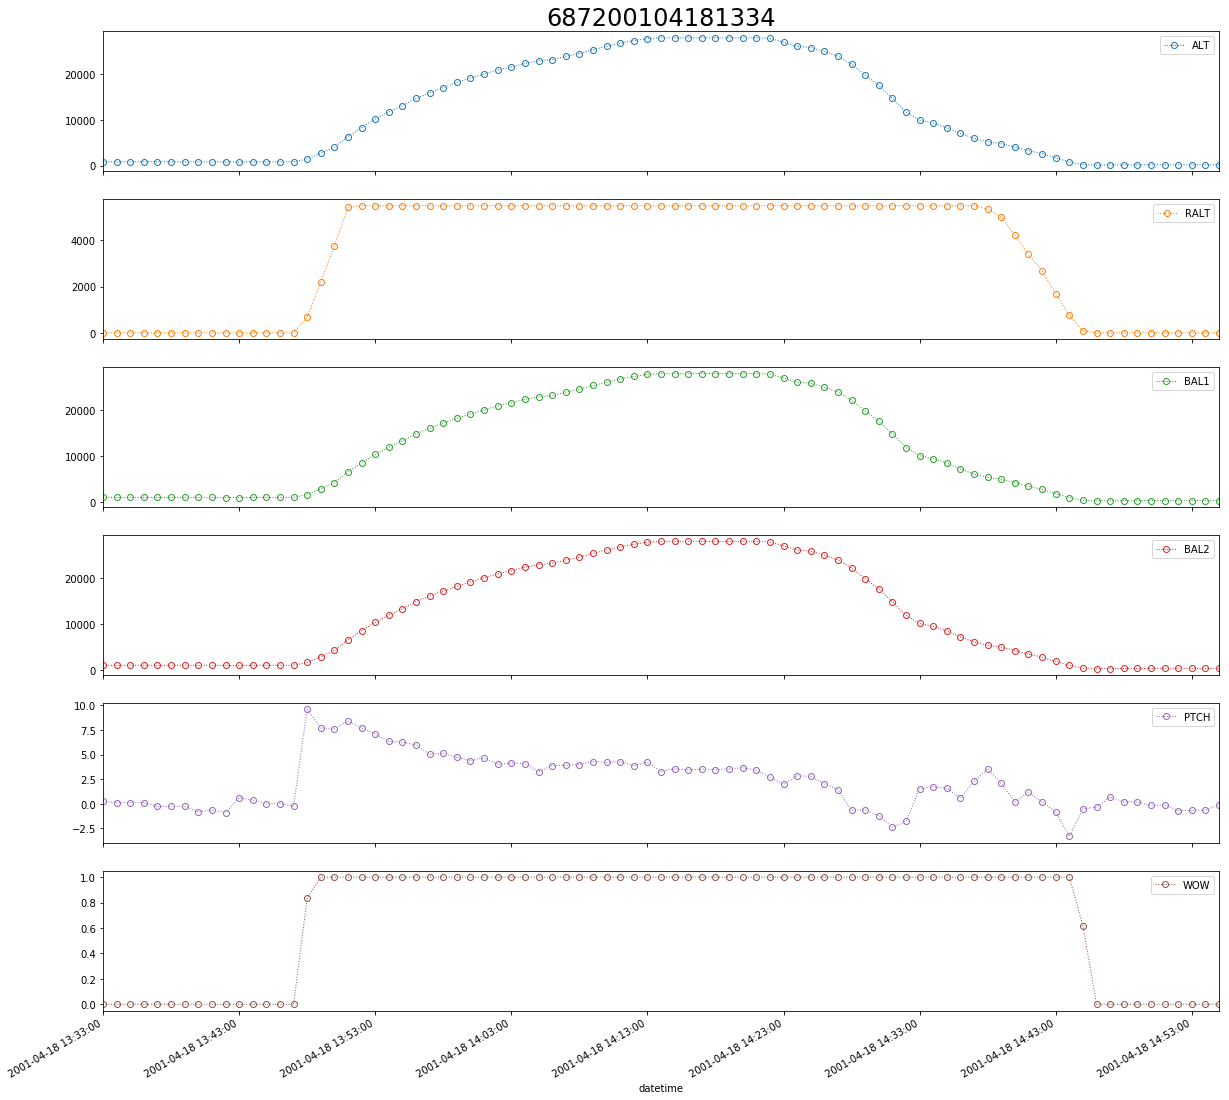

In [0]:
import numpy as np
#df.loc['2001-04-11 12:00':'2001-04-11 12:05',:].plot()
ax = df.loc[df.index.min():df.index.max(), ['ALT','RALT','BAL1','BAL2','PTCH','WOW']] \
    .plot(figsize=(20,20),subplots=True,lw=1,ls=':',marker='o',mfc='None',ms=6)
ax[0].set_title(f'{MATFILENAME}', fontsize=24)
print(type(ax))
#for value in np.ndenumerate(ax):
#    value[1].set_facecolor('white')
#    print(value)
'''
ax[0].set_title('PRESSURE ALTITUDE LSP (ALT)')
ax[0].set_ylabel('FEET')
ax[1].set_title('BARO CORRECT ALTITUDE LSP (BAL1)')
ax[1].set_ylabel('FEET')
ax[2].set_title('BARO CORRECT ALTITUDE LSP (BAL2)')
ax[2].set_ylabel('FEET')
ax[3].set_title('RADIO ALTITUDE LSP (RALT)')
ax[3].set_ylabel('FEET')
'''

In [0]:
#df['RALT'] #shows how alts on ground could be negative

In [0]:
#find direction of lon vs lat chart
#dft = df.loc[df.index.min():df.index.max(), ['LONP','LATP']]; print(dft.head())
#dft = df.loc[df.index.min():df.index.max(), ['LONP','LATP']]; print(dft.tail())

In [0]:
#dft2 = dft.loc[dft.index<=dft.index.min(), :] #to get a df
#dft2

In [0]:
#markersize: ms
#markerfacecolor: mfc
#linewidth: lw
#linestyle: ls
#color: c; must be "color", i.e. not "c" for a list, and when subplots=True

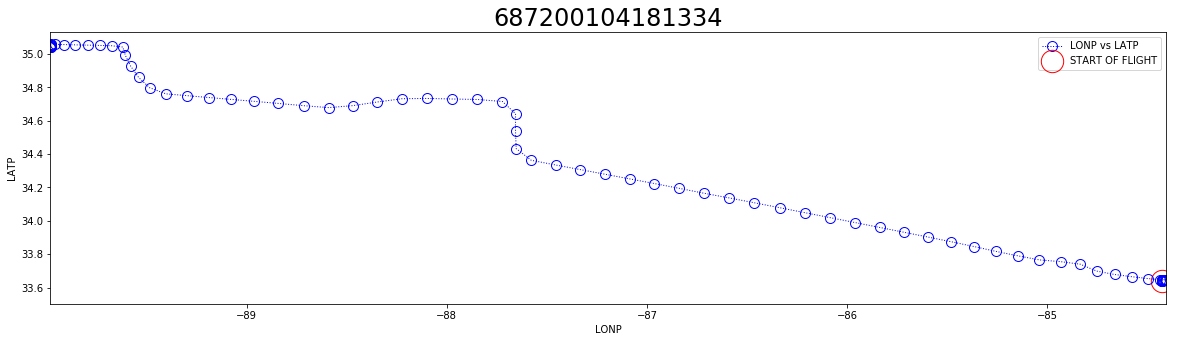

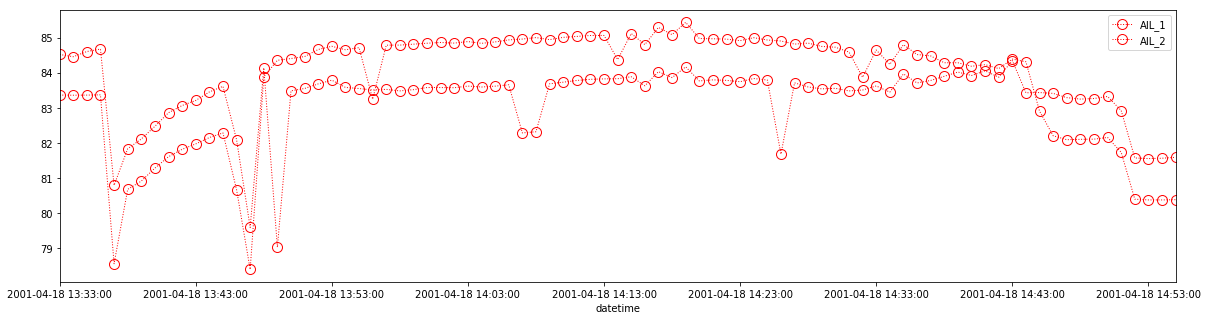

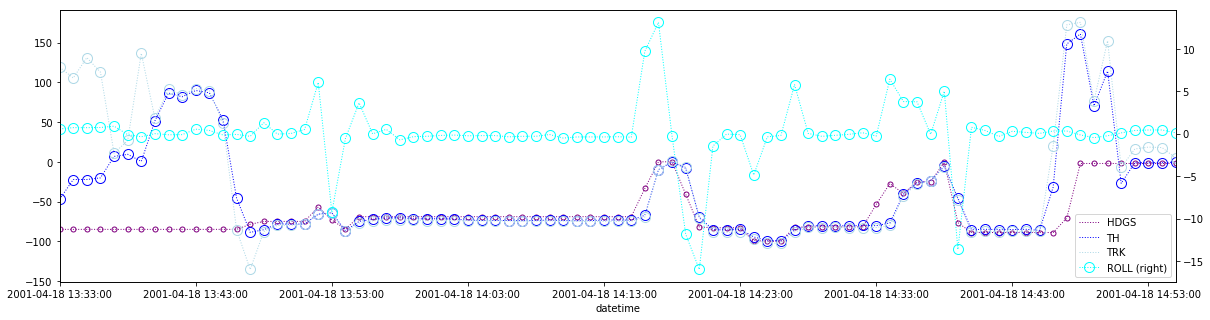

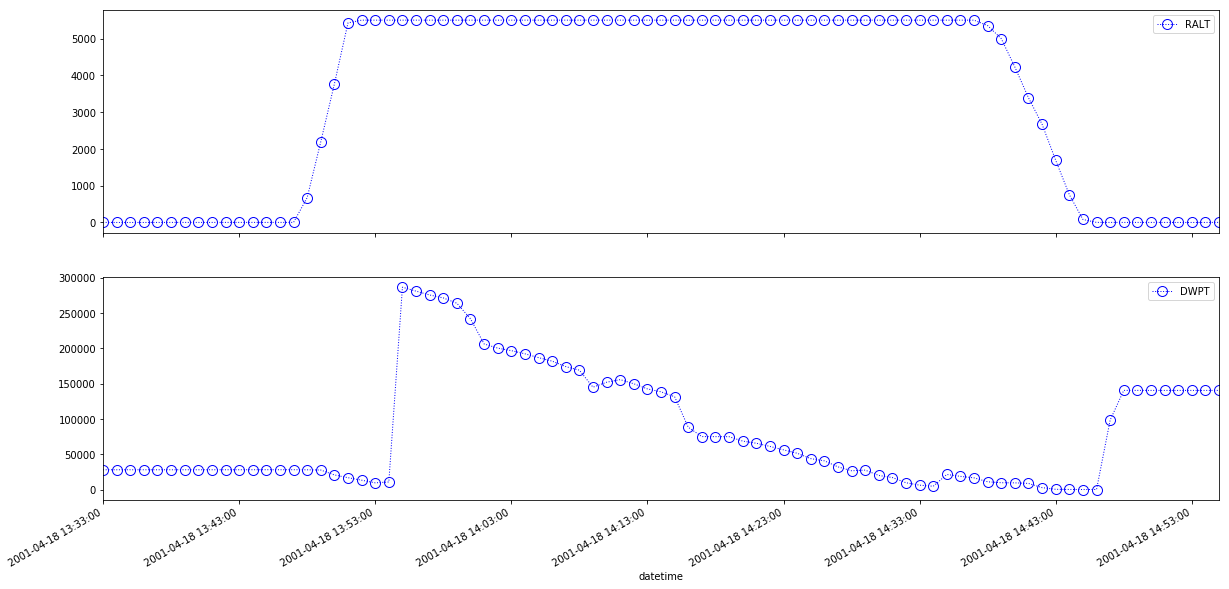

In [0]:
FIGSIZ_1 = (20,5)
FIGSIZ_2 = (20,10)
ax = df.loc[df.index.min():df.index.max(), ['LONP','LATP']] \
    .plot(figsize=FIGSIZ_1, #markevery=[0],
          x='LONP',y='LATP',kind='line',ls=':',lw=1,marker='o',mfc='None',ms=10,c='b')
df.loc[df.index<=df.index.min(), :].plot.scatter(ax=ax, figsize=FIGSIZ_1,  
    x='LONP',y='LATP',marker='o',color='None',s=500,edgecolors='r')

ax.legend(['LONP vs LATP', 'START OF FLIGHT']); ax.set_xlabel('LONP'); ax.set_ylabel('LATP')
ax.set_title(f'{MATFILENAME}', fontsize=24)

df.loc[df.index.min():df.index.max(), ['AIL_1','AIL_2']] \
 .plot(figsize=FIGSIZ_1,kind='line',ls=':',lw=1,marker='o',mfc='None',ms=10,c='r')

ax2 = df.loc[df.index.min():df.index.max(), ['HDGS']]\
 .plot(figsize=FIGSIZ_1,kind='line',ls=':',lw=1,marker='o',mfc='None',ms=5,c='purple')
df.loc[df.index.min():df.index.max(), ['TH']]\
 .plot(ax=ax2,figsize=FIGSIZ_1,kind='line',ls=':',lw=1,marker='o',mfc='None',ms=10,c='b')
df.loc[df.index.min():df.index.max(), ['TRK']]\
 .plot(ax=ax2,figsize=FIGSIZ_1,kind='line',ls=':',lw=1,marker='o',mfc='None',ms=10,c='lightblue')
df.loc[df.index.min():df.index.max(), ['ROLL']]\
 .plot(ax=ax2,figsize=FIGSIZ_1,kind='line',ls=':',lw=1,marker='o',mfc='None',ms=10,c='cyan', secondary_y=True)

ax = df.loc[df.index.min():df.index.max(), ['RALT','DWPT']] \
    .plot(figsize=FIGSIZ_2, subplots=True, kind='line', ls=':', lw=1, marker='o', mfc='None', ms=10, color='b')

Text(0.5, 1.0, '687200104181334')

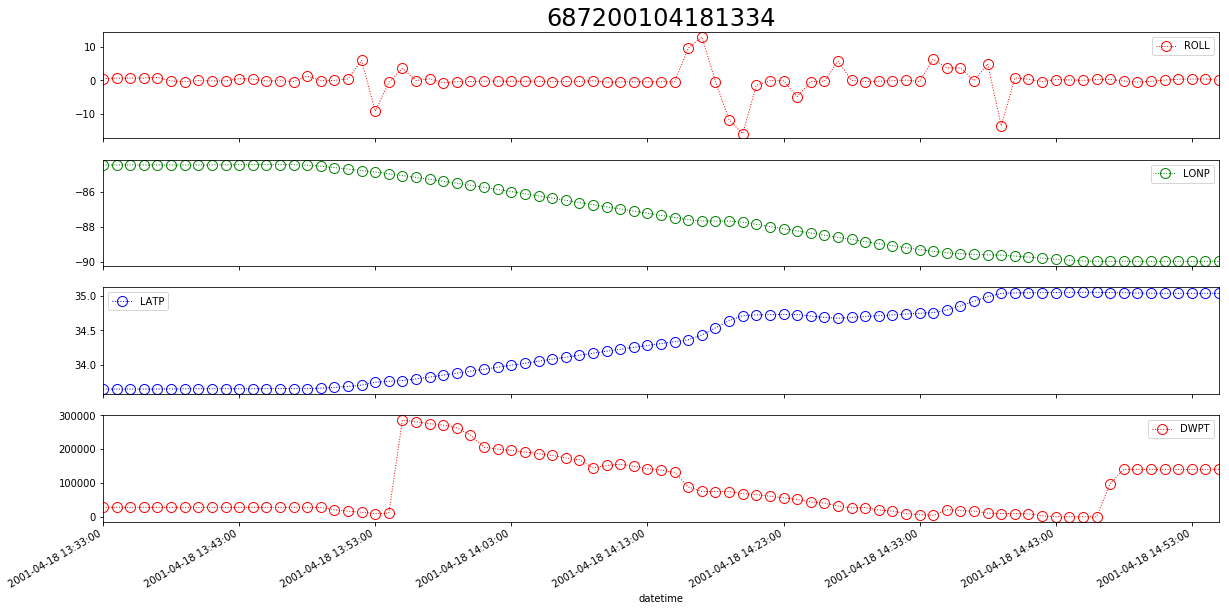

In [0]:
ax = df.loc[df.index.min():df.index.max(), ['ROLL','LONP','LATP','DWPT']] \
    .plot(figsize=(20,10),subplots=True,kind='line',ls=':',lw=1,marker='o', 
        mfc='None', ms=10, color=['r','g','b'])
ax[0].set_title(f'{MATFILENAME}', fontsize=24)

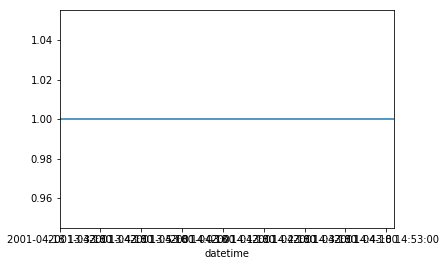

In [0]:
df.GPWS.plot()

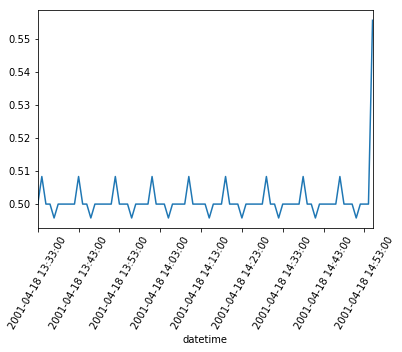

In [0]:
df.SHKR.plot(rot=60)

In [0]:
#df.sort_index(inplace=True)

In [0]:
#df.to_csv(f'{TAIL}/{MATFILENAME}-eda1.csv')

In [0]:
#! ls -altrh {TAIL}/{MATFILENAME}*

In [0]:
#! rm {TAIL}/{MATFILENAME}.csv

In [0]:
#! ls -altrh {TAIL}/{MATFILENAME}*

In [0]:
#! ls -altrh {TAIL}/*.csv